Imort Library


In [15]:
import numpy as np
import pandas as pd
import scipy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem import PorterStemmer
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Z\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
data_path = #r'your_path'

In [17]:
try:
    df = pd.read_csv(data_path)
except pd.errors.ParserError as e:
    print(f"ParserError: {e}")

In [18]:
df['news'] = df['title'] + df['text']
df['label'] = df['label'].replace({'FAKE': 0, 'REAL': 1})

C:\Users\Z\AppData\Local\Temp\ipykernel_19664\4172125504.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace({'FAKE': 0, 'REAL': 1})


In [19]:
df = df.drop(columns=['Unnamed: 0'])

In [20]:
df.head()

,title,text,label,news
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"You Can Smell Hillary’s FearDaniel Greenfield,..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathyU.S...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...


Cleaning Data


Steming & Stopwords


In [21]:

# Initialize PorterStemmer and stopwords
stemmer = PorterStemmer()
stopwords = set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()  # Convert text to lowercase
    text = re.sub(r'\[.*?\]', '', text)  # Remove square brackets and content within them
    text = re.sub(r'https?://\S+|www\.\S+', '', text)  # Remove URLs
    text = re.sub(r'<.*?>+', '', text)  # Remove HTML tags
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)  # Remove punctuation
    text = re.sub(r'\n', '', text)  # Remove newline characters
    text = re.sub(r'\w*\d\w*', '', text)  # Remove words containing numbers
    text = ' '.join([word for word in text.split() if word not in stopwords])  # Remove stopwords
    text = ' '.join([stemmer.stem(word) for word in text.split()])  # Apply stemming
    return text

df['cleaned_text'] = df['text'].apply(clean)
df['cleaned_title'] = df['title'].apply(clean)

# Display the first few rows of the DataFrame to check the results
print(df.head())

                                               title  \
0                       You Can Smell Hillary’s Fear   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2        Kerry to go to Paris in gesture of sympathy   
3  Bernie supporters on Twitter erupt in anger ag...   
4   The Battle of New York: Why This Primary Matters   

                                                text  label  \
0  Daniel Greenfield, a Shillman Journalism Fello...      0   
1  Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2  U.S. Secretary of State John F. Kerry said Mon...      1   
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...      0   
4  It's primary day in New York and front-runners...      1   

                                                news  \
0  You Can Smell Hillary’s FearDaniel Greenfield,...   
1  Watch The Exact Moment Paul Ryan Committed Pol...   
2  Kerry to go to Paris in gesture of sympathyU.S...   
3  Bernie supporters on Twitter erupt in anger ag...   
4  T

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          6335 non-null   object
 1   text           6335 non-null   object
 2   label          6335 non-null   int64 
 3   news           6335 non-null   object
 4   cleaned_text   6335 non-null   object
 5   cleaned_title  6335 non-null   object
dtypes: int64(1), object(5)
memory usage: 297.1+ KB


In [23]:
# Reset index tanpa menyimpan index lama
df_reset = df.reset_index(drop=True)

print(df_reset)

                                                  title  \
0                          You Can Smell Hillary’s Fear   
1     Watch The Exact Moment Paul Ryan Committed Pol...   
2           Kerry to go to Paris in gesture of sympathy   
3     Bernie supporters on Twitter erupt in anger ag...   
4      The Battle of New York: Why This Primary Matters   
...                                                 ...   
6330  State Department says it can't find emails fro...   
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332  Anti-Trump Protesters Are Tools of the Oligarc...   
6333  In Ethiopia, Obama seeks progress on peace, se...   
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text  label  \
0     Daniel Greenfield, a Shillman Journalism Fello...      0   
1     Google Pinterest Digg Linkedin Reddit Stumbleu...      0   
2     U.S. Secretary of State John F. Kerry said Mon...      1   
3     — Kaydee King (@Kayde

In [24]:
df.isnull().sum()

title            0
text             0
label            0
news             0
cleaned_text     0
cleaned_title    0
dtype: int64

In [25]:
df['filered_text']=df['news'].apply(clean)

In [26]:
df.head()

,title,text,label,news,cleaned_text,cleaned_title,filered_text
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,"You Can Smell Hillary’s FearDaniel Greenfield,...",daniel greenfield shillman journal fellow free...,smell hillary’ fear,smell hillary’ feardaniel greenfield shillman ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,Watch The Exact Moment Paul Ryan Committed Pol...,googl pinterest digg linkedin reddit stumbleup...,watch exact moment paul ryan commit polit suic...,watch exact moment paul ryan commit polit suic...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,Kerry to go to Paris in gesture of sympathyU.S...,us secretari state john f kerri said monday st...,kerri go pari gestur sympathi,kerri go pari gestur sympathyu secretari state...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,Bernie supporters on Twitter erupt in anger ag...,— kayde king kaydeek novemb lesson tonight dem...,berni support twitter erupt anger dnc tri warn,berni support twitter erupt anger dnc tri warn...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,The Battle of New York: Why This Primary Matte...,primari day new york frontrunn hillari clinton...,battl new york primari matter,battl new york primari mattersit primari day n...


[Text(0, 0, '3164'), Text(0, 0, '3171')]

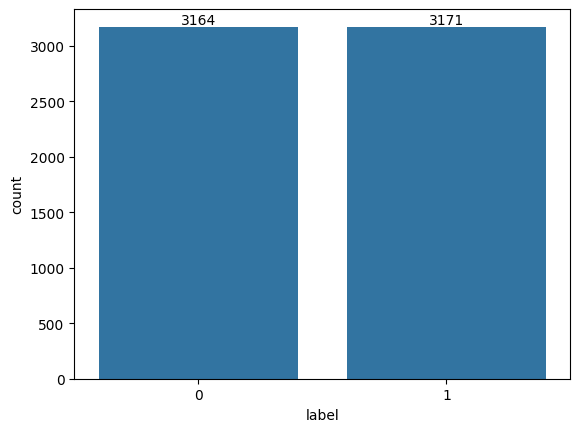

In [27]:
import seaborn as sns
ax = sns.countplot(x = df['label'])
ax.bar_label(ax.containers[0])

No nulls (dataset is complete)
Only text columns (no numeric data)
Classes are balanced


Tokenization & TF IDF


In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['filered_text'], df['label'], test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

EDA


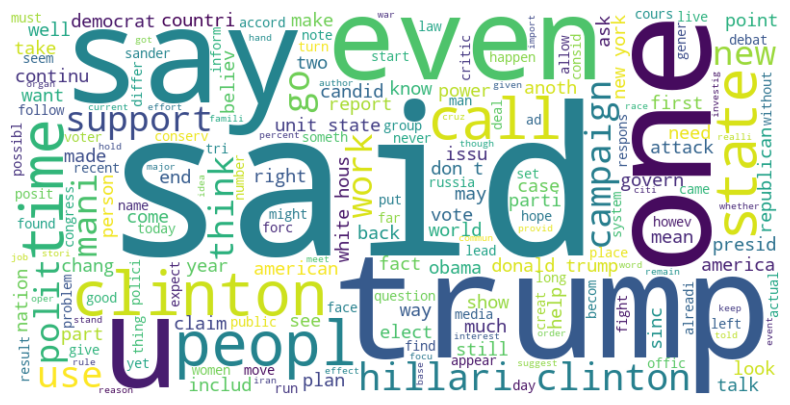

In [30]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Ambil nilai dari kolom filtered_text dan gabungkan menjadi satu string
string = ' '.join(df['filered_text'].astype(str).tolist())

# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(string)

# Tampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

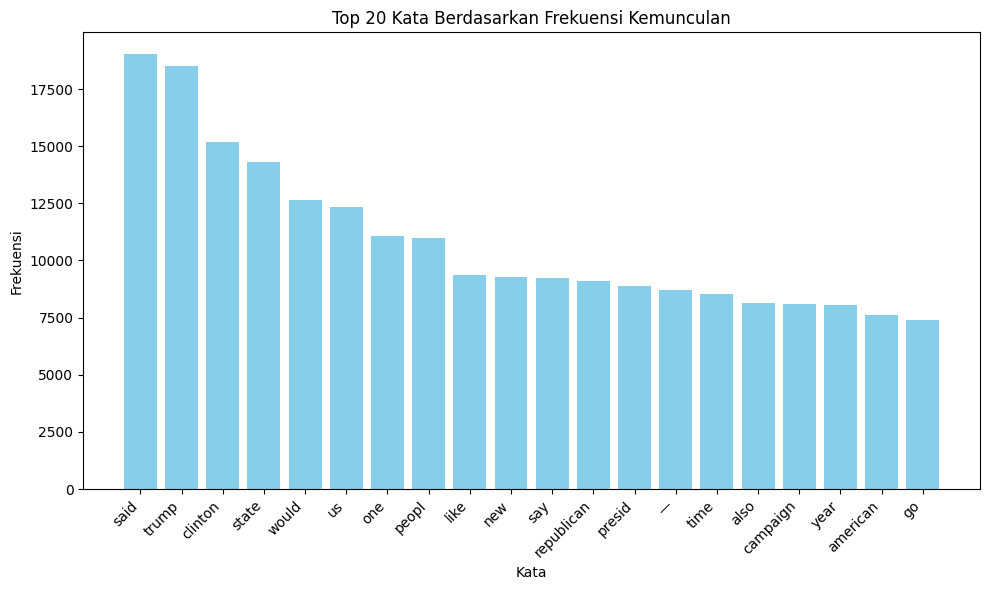

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

all_text = ' '.join(df['filered_text'])

# Menghitung frekuensi kemunculan setiap kata
words_count = Counter(all_text.split())

# Mengambil 20 kata dengan frekuensi tertinggi
top_words = words_count.most_common(20)

# Membuat dataframe dari top_words
df_top_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])

# Plotting barplot
plt.figure(figsize=(10, 6))
plt.bar(df_top_words['Word'], df_top_words['Frequency'], color='skyblue')
plt.xlabel('Kata')
plt.ylabel('Frekuensi')
plt.title('Top 20 Kata Berdasarkan Frekuensi Kemunculan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Menggabungkan semua teks menjadi satu string
all_text1 = ' '.join(df['filered_text'])

# Menghitung frekuensi kemunculan setiap kata
words_count = Counter(all_text1.split())

# Mengambil 10 kata dengan frekuensi tertinggi
top_10_words = words_count.most_common(10)

df_top_10 = pd.DataFrame(top_10_words, columns=['Word', 'Count'])

def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: red' if v else '' for v in is_max]

# Menerapkan highlight pada kolom 'Count'
styled_df = df_top_10.style.apply(highlight_max, subset=['Count'])

# Menampilkan DataFrame dengan warna highlight
print("10 kata paling sering muncul dan jumlahnya (dengan warna merah untuk hasil paling banyak):")
display(styled_df)

10 kata paling sering muncul dan jumlahnya (dengan warna merah untuk hasil paling banyak):


,Word,Count
0,said,19032
1,trump,18496
2,clinton,15187
3,state,14321
4,would,12634
5,us,12355
6,one,11078
7,peopl,10996
8,like,9351
9,new,9285


Models dan Metrics


In [33]:
from sklearn.metrics import roc_auc_score



In [34]:
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)

y_pred_proba = classifier.predict_proba(X_test_tfidf)[:, 1]

# Menghitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc:.4f}')

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.9564
Accuracy: 0.8879242304656669

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.89      0.89       628
           1       0.90      0.88      0.89       639

    accuracy                           0.89      1267
   macro avg       0.89      0.89      0.89      1267
weighted avg       0.89      0.89      0.89      1267



In [35]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()

lr_model.fit(X_train_tfidf, y_train)


y_pred = lr_model.predict(X_test_tfidf)

y_pred_proba = lr_model.predict_proba(X_test_tfidf)[:, 1]

# Menghitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc:.4f}')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.9778
Accuracy: 0.9171270718232044

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92       628
           1       0.92      0.91      0.92       639

    accuracy                           0.92      1267
   macro avg       0.92      0.92      0.92      1267
weighted avg       0.92      0.92      0.92      1267



In [36]:
from sklearn.svm import SVC

classifier = SVC(kernel='linear')


classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)

y_pred_scores = classifier.decision_function(X_test_tfidf)

# Menghitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_scores)

print(f'ROC AUC Score: {roc_auc:.4f}')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.9812
Accuracy: 0.9281767955801105

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [37]:
from sklearn.ensemble import GradientBoostingClassifier

classifier = GradientBoostingClassifier()


classifier.fit(X_train_tfidf, y_train)


y_pred = classifier.predict(X_test_tfidf)

y_pred_proba = classifier.predict_proba(X_test_tfidf)[:, 1]

# Menghitung ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f'ROC AUC Score: {roc_auc:.4f}')
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

ROC AUC Score: 0.9658
Accuracy: 0.8966061562746646

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.90       628
           1       0.91      0.88      0.90       639

    accuracy                           0.90      1267
   macro avg       0.90      0.90      0.90      1267
weighted avg       0.90      0.90      0.90      1267



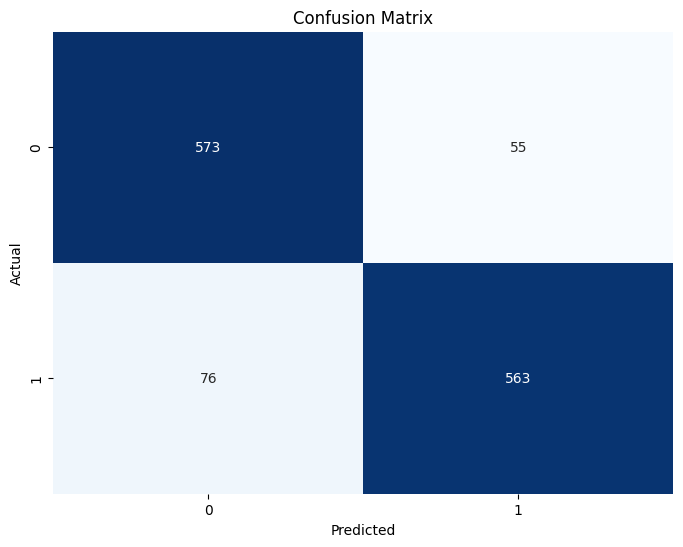

In [38]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

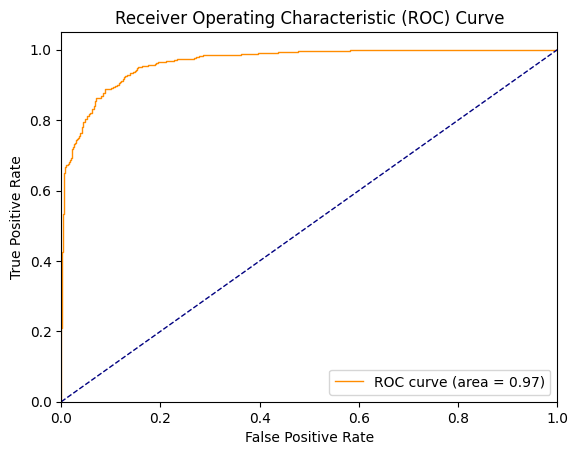

In [39]:
#model evaluation logistic regression
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
import joblib

In [41]:
# Save the trained logistic regression model
joblib.dump(lr_model, 'lr_model.pkl')

# Save the TF-IDF vectorizer
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']